In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *

import CNN

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CNN

Use a simple convolutional neural network whose architecture is similar to the classical LeNet. 

In [28]:
torch.manual_seed(42)
niter = 15
nround = 25
all_classified = []
misclassified = []
accuracies_train = []
accuracies_test = []
accuracies_val = []
losses_train = np.zeros((niter,nround))
losses_val = np.zeros((niter,nround))
mini_batch_size = 100
for i in range(niter):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = load_data(1000)
    
    # Split test into test and val
    val_input = test_input[:500]
    test_input = test_input[500:]
    val_target = test_target[:500]
    test_target = test_target[500:]
    
    # define the model
    model = CNN.CNN() 

    # train model
    for k in range(nround):
        losses_train[i,k] = CNN.train(model.train(), train_input, train_target, mini_batch_size )
        losses_val[i,k] = CNN.get_loss_val(model.eval(),val_input,val_target)
    train_accuracy = CNN.accuracy(model(train_input),train_target)
    test_accuracy = CNN.accuracy(model(test_input),test_target)
    val_accuracy = CNN.accuracy(model(val_input),val_target)
    
    misclass = CNN.get_mis_class(model,val_input,val_target,test_classes[:500])
    [all_classified.append(x) for x in test_classes[:500]]
    [misclassified.append(x) for x in misclass ]
    accuracies_train.append(train_accuracy )
    accuracies_test.append(test_accuracy )
    accuracies_val.append(val_accuracy )
    print(f"Training accuracy is {train_accuracy} ")
    print(f"Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 1.0 
Test accuracy is 0.782 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 1.0 
Test accuracy is 0.798 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 1.0 
Test accuracy is 0.816 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 1.0 
Test accuracy is 0.838 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 1.0 
Test accuracy is 0.84 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 1.0 
Test accuracy is 0.782 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 1.0 
Test accuracy is 0.834 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 1.0 
Test accuracy is 0.802 
-------------------------------------------------

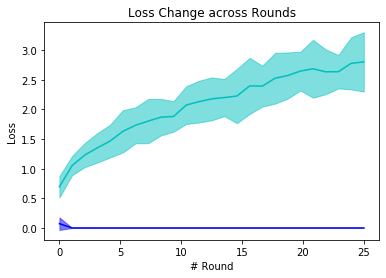

In [44]:
plt.figure()
plotloss((losses_train/(train_input.size(0)/mini_batch_size)).T,color= 'b')
plotloss(losses_val.T,color= 'c')
plt.show()

### Evaluation of model performance

In [31]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 1.0000 ± 0.0000 


In [32]:
accs_val = torch.Tensor(accuracies_val)
print(f"The test accuracy of the model is {accs_val.mean():.4f} ± {accs_val.var():.4f} ")

The test accuracy of the model is 0.8092 ± 0.0002 


In [33]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8107 ± 0.0005 


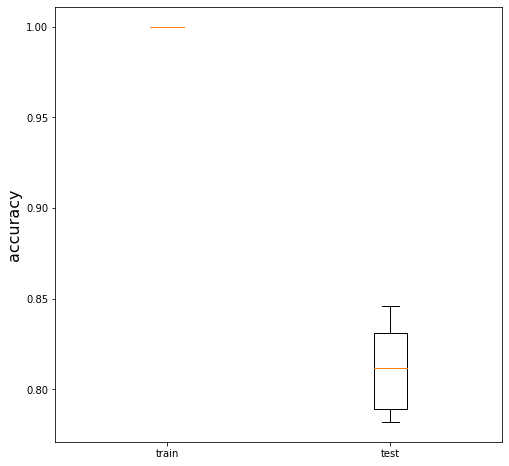

In [34]:
plot_performance(accuracies_train,accuracies_test)

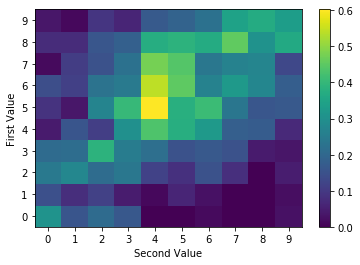

In [45]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
plot_heatmap(misclassified,all_classified)